In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
raw_dataset=pd.read_csv('/content/drive/MyDrive/PDS/Question2/Raw_Data/StudentsPerformance.csv')
raw_dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
raw_dataset.rename(columns = {'race/ethnicity':'race_or_ethnicity',
                     'parental level of education':'parental_level_of_education',
    'test preparation course':'test_preparation_course',
                       'math score':'math_score',
                       'reading score':'reading_score',
                        'writing score':'writing_score'}, inplace = True)
raw_dataset.to_csv('/content/drive/MyDrive/PDS/Question2/Clean_Data/Clean_StudentsPerformance.csv')

The scatter plot's ability to graphically emphasize relationships, spot outliers, and display data density makes analyzing the relationship between reading and math scores easier. This makes interpretation simpler and directs future statistical research or instructional plans.

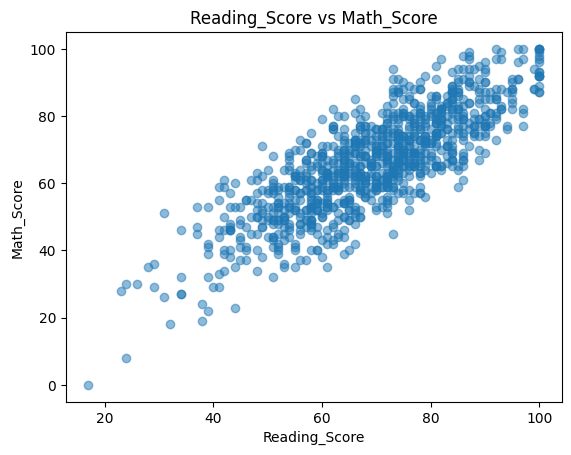

In [ ]:
import matplotlib.pyplot as plt

v= plt.scatter(raw_dataset['reading_score'], raw_dataset['math_score'], alpha=0.5)
plt.xlabel('Reading_Score')
plt.ylabel('Math_Score')
plt.title('Reading_Score vs Math_Score')
plt.show()
fig = v.get_figure()
fig.savefig("//content/drive/MyDrive/PDS/Question2/Results/readingvsmathscore.png")

It is simple to determine the frequency of each group thanks to the count plot, which graphically shows the distribution of race and ethnicity in the dataset. This makes it easier to compare groups quickly and identifies demographic trends that should be looked into further.

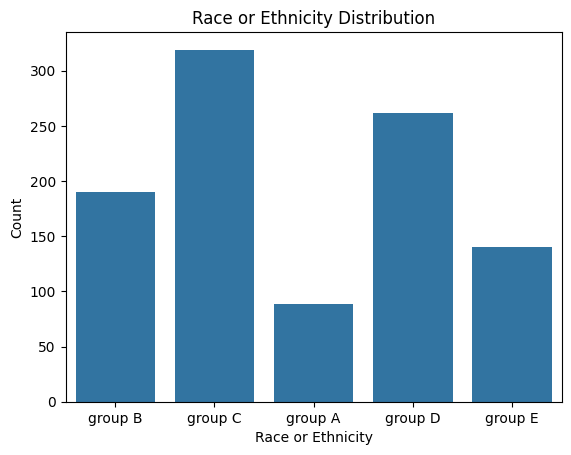

In [ ]:
import seaborn as sns
v=sns.countplot(x='race_or_ethnicity', data=raw_dataset)
plt.title('Race or Ethnicity Distribution')
plt.xlabel('Race or Ethnicity')
plt.ylabel('Count')
plt.show()
fig = v.get_figure()
fig.savefig("/content/drive/MyDrive/PDS/Question2/Results/bar.png")


The distribution of race and ethnicity in the dataset is visually represented by the pie chart, which makes it simple to quickly see the percentages of each category. In addition to highlighting demographic variety and streamlining category comparisons, this helps clarify how these factors might affect other analyses or results.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


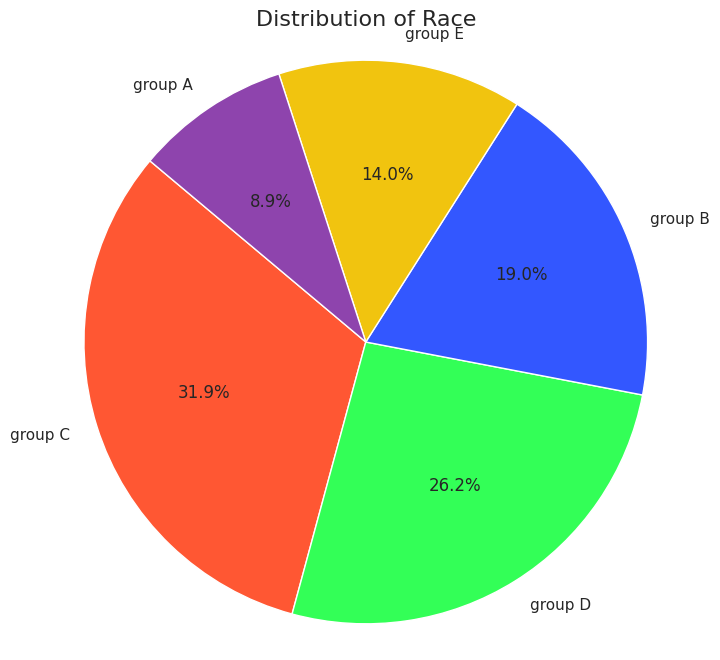

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')
rd = raw_dataset['race_or_ethnicity'].value_counts()
plt.figure(figsize=(8, 8))
labels = rd.index
sizes = rd.values
colors = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#8E44AD', '#E67E22']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors[:len(labels)])
plt.title('Distribution of Race', fontsize=16)
plt.axis('equal')
op = "/content/drive/MyDrive/PDS/Question2/Results/pie.png"
plt.savefig(op)


The box plot makes it simple to identify medians, quartiles, and possible outliers by displaying the distribution of math scores across various parental education levels. This graphic highlights the potential impact of parental education on student achievement while reducing the comparison of score variability between groups.

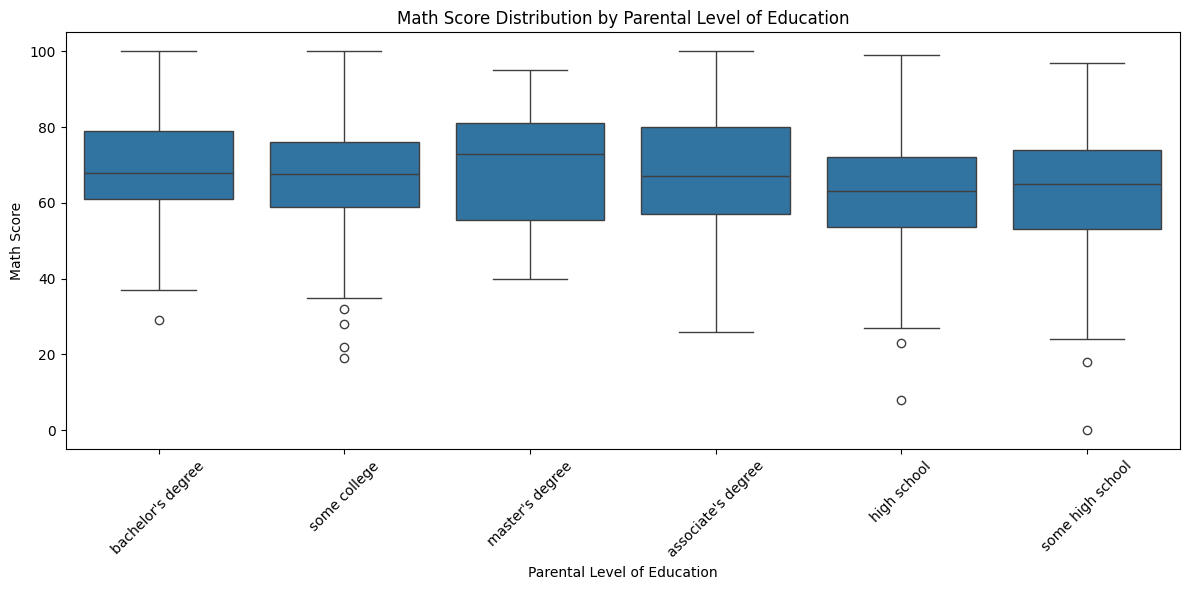

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
v=sns.boxplot(data=raw_dataset, x='parental_level_of_education', y='math_score')
plt.title('Math Score Distribution by Parental Level of Education')
plt.ylabel('Math Score')
plt.xlabel('Parental Level of Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
fig = v.get_figure()
fig.savefig("/content/drive/MyDrive/PDS/Question2/Results/box.png")



The links between math, reading, and writing scores are clearly represented in the correlation heatmap, which facilitates quick identification of correlation strengths. This makes it easier to analyze how these ratings relate to one another and helps identify possible areas for assistance or educational focus.

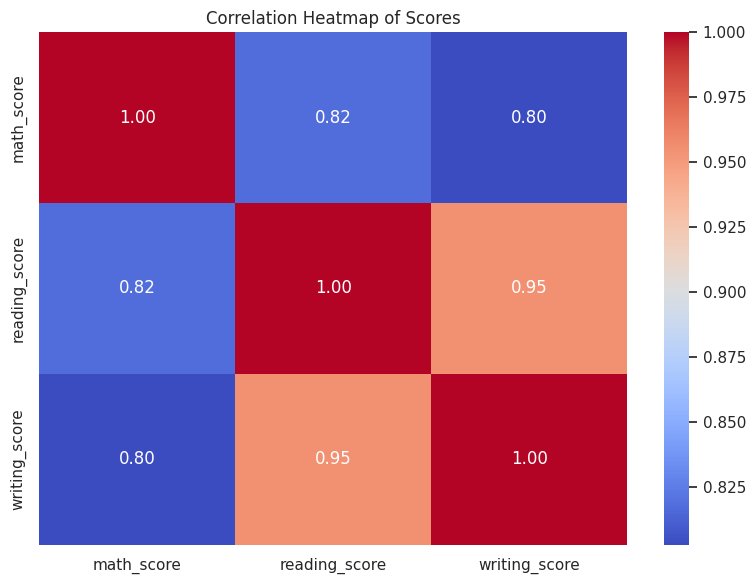

In [ ]:
plt.figure(figsize=(8, 6))
correlation_matrix = raw_dataset[['math_score', 'reading_score', 'writing_score']].corr()
v=sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Scores')
plt.tight_layout()
plt.show()
fig = v.get_figure()
fig.savefig("/content/drive/MyDrive/PDS/Question2/Results/heat.png")



When combining data points based on race or ethnicity, the pair plot offers a thorough understanding of the connections between math, reading, and writing results. Determining patterns, correlations, and possible interactions between variables is made easier with the help of this visualization, which contributes to a better understanding of the ways in which demographic factors affect academic achievement.

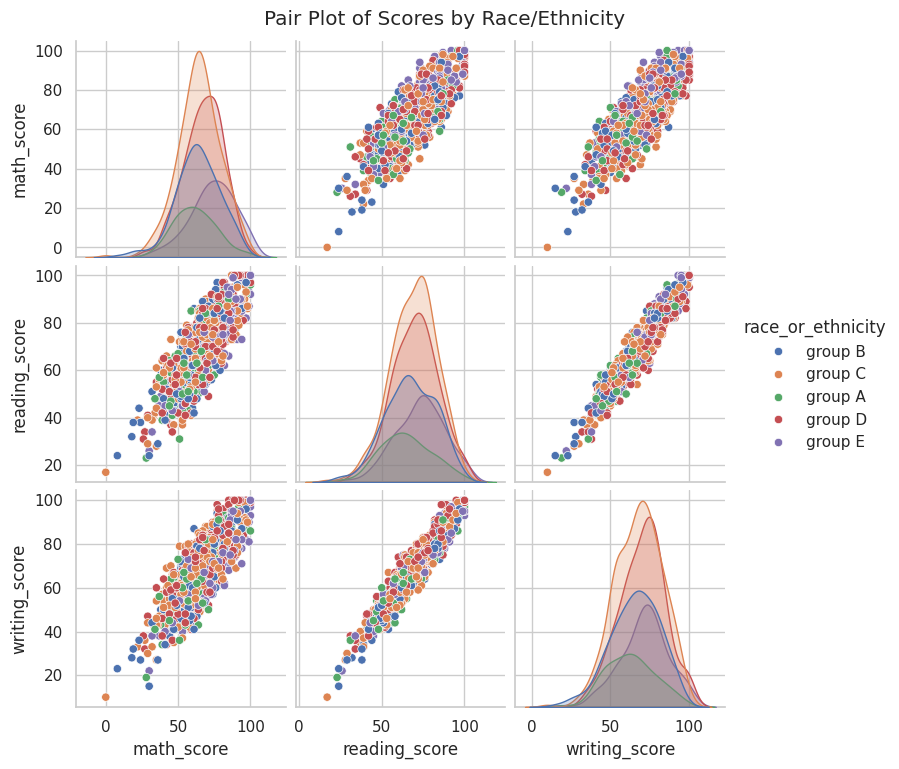

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
v = sns.pairplot(raw_dataset[['math_score', 'reading_score', 'writing_score', 'race_or_ethnicity']],
                 hue='race_or_ethnicity',
                 palette='deep')
plt.suptitle('Pair Plot of Scores by Race/Ethnicity', y=1.02)
output_path = "/content/drive/MyDrive/PDS/Question2/Results/pair.png"
v.savefig(output_path)

